In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Add, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)


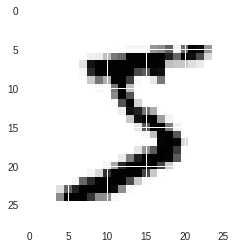

In [4]:
print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(28, 28, 1))
X = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inputs)
X = Conv2D(64, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)
X = Dropout(0.25)(X)
X = Flatten()(X)
X = Dense(196, activation='relu')(X)
recon = MaxPooling2D((2, 2))(inputs)
recon = Reshape((196,), input_shape=(28, 28))(recon)
X = Add()([recon, X])
X = Dropout(0.5)(X)
output = Dense(num_classes, activation='softmax')(X)
model = Model(inputs=[inputs], outputs=[output])
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 64)   0           conv2d_2[0][0]                   
____________________________________

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, 
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.2758 - acc: 0.9129 - val_loss: 0.0872 - val_acc: 0.9720
Epoch 2/12
60000/60000 [==============================] - 11s 191us/step - loss: 0.0884 - acc: 0.9727 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 3/12
26880/60000 [============>.................] - ETA: 6s - loss: 0.0663 - acc: 0.9799

60000/60000 [==============================] - 11s 191us/step - loss: 0.0643 - acc: 0.9804 - val_loss: 0.0387 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 11s 191us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0317 - val_acc: 0.9885
Epoch 5/12
58368/60000 [============================>.] - ETA: 0s - loss: 0.0458 - acc: 0.9863

60000/60000 [==============================] - 11s 191us/step - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0278 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0285 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.0290 - val_acc: 0.9909
Epoch 8/12
 2944/60000 [>.............................] - ETA: 10s - loss: 0.0454 - acc: 0.9851

60000/60000 [==============================] - 11s 191us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0274 - val_acc: 0.9910
Epoch 9/12
60000/60000 [==============================] - 11s 191us/step - loss: 0.0297 - acc: 0.9903 - val_loss: 0.0277 - val_acc: 0.9915
Epoch 10/12
51584/60000 [========================>.....] - ETA: 1s - loss: 0.0267 - acc: 0.9914

60000/60000 [==============================] - 11s 191us/step - loss: 0.0268 - acc: 0.9913 - val_loss: 0.0279 - val_acc: 0.9917
Epoch 11/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.0300 - val_acc: 0.9916
Epoch 12/12
60000/60000 [==============================] - 11s 191us/step - loss: 0.0230 - acc: 0.9926 - val_loss: 0.0268 - val_acc: 0.9915
Test loss: 0.026807019163471932
Test accuracy: 0.9915


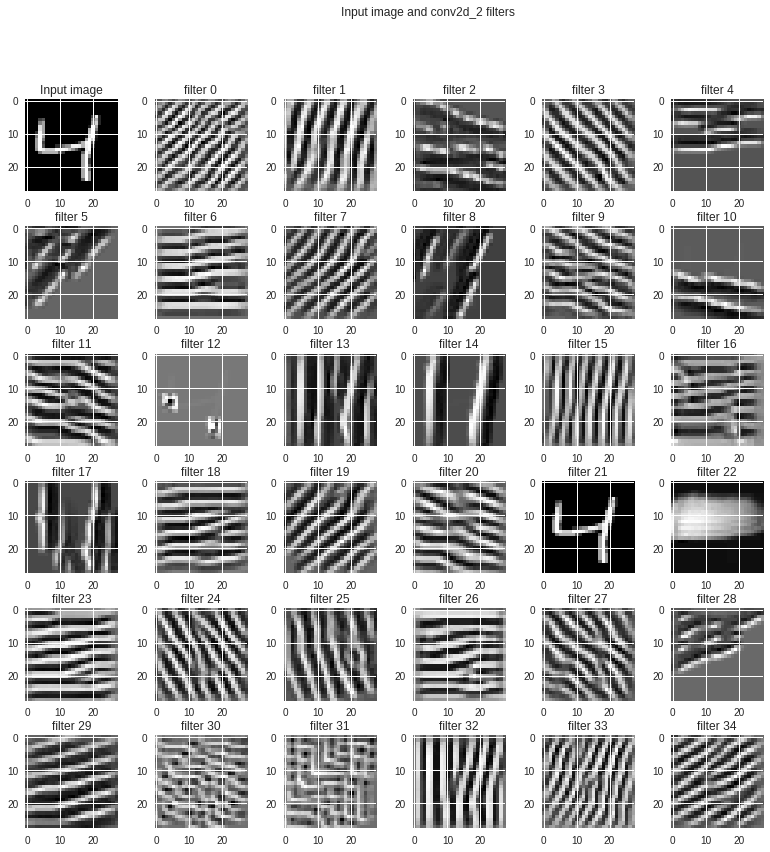

In [7]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()